# TUGAS AI 3

# Library

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data

In [0]:
Data = pd.read_csv('https://drive.google.com/uc?export=download&id=1mwziYdWvfjwZL35fPAmDojc_6x9P1Mvt', sep=';')

## Indexing Data

In [0]:
def indexingData(Data):
  id_temp = []   
  tes_temp = []
  kep_temp = []
  diterima_temp = []
  for index, row in Data.iterrows():
      id_temp.append(row['ID'])
      tes_temp.append(row['Tes Kompetensi'])
      kep_temp.append(row['Kepribadian'])
      diterima_temp.append(row['Diterima'])
  return [id_temp,tes_temp,kep_temp,diterima_temp]

## Data Train

In [0]:
def indexingDataTrain(Data):
  rowDataTrain = [Data[0][:20],Data[1][:20],Data[2][:20],Data[3][:20]]
  row0Train = rowDataTrain[0]
  row1Train = rowDataTrain[1]
  row2Train = rowDataTrain[2]
  return row0Train, row1Train, row2Train

DataTrain = Data[:20]
Data.head(20)

,ID,Tes Kompetensi,Kepribadian,Diterima
0,P1,61.0,37.5,Tidak
1,P2,71.0,58.3,Ya
2,P3,64.0,35.8,Tidak
3,P4,60.0,51.7,Tidak
4,P5,73.5,75.0,Ya
5,P6,66.5,62.5,Ya
6,P7,82.5,15.0,Tidak
7,P8,61.0,37.5,Tidak
8,P9,52.5,54.2,Tidak
9,P10,57.5,79.2,Ya


## Data Test

In [0]:
def indexingDataTest(Data):
  rowDataTest = [Data[0][20:],Data[1][20:],Data[2][20:],Data[3][20:]]
  row0Test = rowDataTest[0]
  row1Test = rowDataTest[1]
  row2Test = rowDataTest[2]
  return row0Test,row1Test,row2Test

DataTest = Data[20:]
Data.tail(10)

,ID,Tes Kompetensi,Kepribadian,Diterima
20,P21,61.5,52.5,?
21,P22,66.5,58.3,?
22,P23,71.0,45.8,?
23,P24,64.5,55.0,?
24,P25,57.5,79.2,?
25,P26,80.0,45.8,?
26,P27,81.5,53.3,?
27,P28,61.0,64.2,?
28,P29,46.0,65.8,?
29,P30,78.0,49.2,?


## Akurasi Data

In [0]:
def akurasiData(predict,data):
  akurasi = 0
  for i in range(len(data)):
    if DataTrain['Diterima'][i] == predict[i]:  akurasi += 1
  print("Akurasi Data Prediksi :", (akurasi/len(data))*100, "%")

# Fuzzy System Method

## Method Kompetensi

### Set Parameter Kompetensi

In [0]:
def setParameterKompetensi():
  print("Rendah < Rendah-Sedang < Sedang-Tinggi < Tinggi")
  print()
  aKom = float(input("Parameter Rendah : "))
  bKom = float(input("Parameter Rendah-Sedang : "))
  cKom = float(input("Parameter Sedang-Tinggi : "))
  dKom = float(input("Parameter Tinggi : "))
  return aKom,bKom,cKom,dKom
  

### Rendah

In [0]:
def kompetensiRendah(x,aKom,bKom):
    if (x < aKom ): 
      return 1
    elif (x < bKom): 
      return (-((x - bKom) / (bKom - aKom)))
    else: 
      return 0

### Sedang

In [0]:
def kompetensiSedang(x,aKom,bKom,cKom,dKom):
    if (aKom < x <= bKom): 
      return ((x - aKom) / (bKom - aKom))
    elif (bKom < x <= cKom):
      return 1
    elif (cKom < x <= dKom): 
      return (-((x - dKom) / (dKom - cKom)))
    else: 
      return 0

### Tinggi

In [0]:
def kompetensiTinggi(x,cKom,dKom):
    if (x < cKom): 
      return 0
    elif (x > dKom): 
      return 1
    else: 
      return ((x - cKom) / (dKom - cKom))

### Fungsi Grafik Kompetensi

In [0]:
def grafikKompetensi(s,aKom,bKom,cKom,dKom):
    kompetensiRange = np.arange(0, s, 1)
    plt.plot(kompetensiRange, [kompetensiRendah(x,aKom,bKom) for x in kompetensiRange], color='Cyan', label='Rendah')
    plt.plot(kompetensiRange, [kompetensiSedang(x,aKom,bKom,cKom,dKom) for x in kompetensiRange], color='Magenta', label='Sedang')
    plt.plot(kompetensiRange, [kompetensiTinggi(x,cKom,dKom) for x in kompetensiRange], color='Black', label='Tinggi')
    plt.legend()
    plt.show()

##Method Kepribadian

### Set Parameter Kepribadian

In [0]:
def setParameterKepribadian():
    print("Parameter < Skala")
    print("Buruk < Buruk-Cukup < Cukup-Baik < Baik")
    aKep = float(input("Parameter Buruk : "))
    bKep = float(input("Parameter Buruk-Cukup : "))
    cKep = float(input("Parameter Cukup-Baik : "))
    dKep = float(input("Parameter Baik : "))
    return aKep,bKep,cKep,dKep

### Buruk

In [0]:
def kepribadianBuruk(x,aKep,bKep):
    if (x < aKep): 
      return 1
    elif (x < bKep): 
      return (-((x - bKep) / (bKep - aKep)))
    else: 
      return 0

### Cukup

In [0]:
def kepribadianCukup(x,aKep,bKep,cKep,dKep):
    if (aKep < x <= bKep): 
      return ((x - aKep) / (bKep - aKep))
    elif (bKep < x <= cKep):
      return 1
    elif (cKep < x <= dKep): 
      return (-((x - dKep) / (dKep - cKep)))
    else: 
      return 0

### Baik

In [0]:
def kepribadianBaik(x,cKep,dKep):
    if (x < cKep): 
      return 0
    elif (x > dKep): 
      return 1
    else: 
      return ((x - cKep) / (dKep - cKep))

###Fungsi Grafik Kepribadian

In [0]:
def grafikKepribadian(s,aKep,bKep,cKep,dKep):
    kepribadianRange = np.arange(0, s ,1)
    plt.plot(kepribadianRange, [kepribadianBuruk(x,aKep,bKep) for x in kepribadianRange], color='Cyan', label='Buruk')
    plt.plot(kepribadianRange, [kepribadianCukup(x,aKep,bKep,cKep,dKep) for x in kepribadianRange], color='Magenta', label='Cukup')
    plt.plot(kepribadianRange, [kepribadianBaik(x,cKep,dKep) for x in kepribadianRange], color='Black', label='Baik')
    plt.legend()
    plt.show()

## Method Model Mamdani

In [0]:
def mamdani(Tidak, Ya) :
    titikTidak = 10+20+30+40+50+60
    titikYa = 70+80+90+100
    return ((titikTidak * Tidak  + titikYa * Ya) / (6 * Tidak + 4 * Ya))

## Method Fuzzy List

In [0]:
def fuzzyList(data,aKom,bKom,cKom,dKom,aKep,bKep,cKep,dKep):	
    ListKompetensi = []
    ListKepribadian = []

    for i, n in data.iterrows():
      Kompetensi = {        
        "Rendah" : kompetensiRendah(n['Tes Kompetensi'],aKom,bKom),
        "Sedang" : kompetensiSedang(n['Tes Kompetensi'],aKom,bKom,cKom,dKom),
        "Tinggi" : kompetensiTinggi(n['Tes Kompetensi'],cKom,dKom)
      }
      ListKompetensi.append(Kompetensi)

      Kepribadian = {
        "Buruk" : kepribadianBuruk(n['Kepribadian'],aKep,bKep),
        "Cukup" : kepribadianCukup(n['Kepribadian'],aKep,bKep,cKep,dKep),
        "Baik" : kepribadianBaik(n['Kepribadian'],cKep,dKep)
      }
      ListKepribadian.append(Kepribadian)

    return ListKompetensi, ListKepribadian

## Method Fuzzy Rules

In [0]:
def fuzzyLogic(data,aKom,bKom,cKom,dKom,aKep,bKep,cKep,dKep):
    kompetensi, kepribadian = fuzzyList(data,aKom,bKom,cKom,dKom,aKep,bKep,cKep,dKep)	
    kelayakan = []
    for x in range(len(data)) :
      tidak = []
      ya = []
      tidak.append(np.minimum(kompetensi[x]["Rendah"], kepribadian[x]["Buruk"]))
      tidak.append(np.minimum(kompetensi[x]["Sedang"], kepribadian[x]["Buruk"]))
      tidak.append(np.minimum(kompetensi[x]["Tinggi"], kepribadian[x]["Buruk"]))
      
      tidak.append(np.minimum(kompetensi[x]["Rendah"], kepribadian[x]["Cukup"]))
      ya.append(np.minimum(kompetensi[x]["Sedang"], kepribadian[x]["Cukup"]))
      ya.append(np.minimum(kompetensi[x]["Tinggi"], kepribadian[x]["Cukup"]))
      
      tidak.append(np.minimum(kompetensi[x]["Rendah"], kepribadian[x]["Baik"]))
      ya.append(np.minimum(kompetensi[x]["Sedang"], kepribadian[x]["Baik"]))
      ya.append(np.minimum(kompetensi[x]["Tinggi"], kepribadian[x]["Baik"]))
      listK = {"Tidak" : np.max(tidak),"Ya" : np.max(ya)}
      kelayakan.append(listK)
    return kelayakan


## Method Defuzzyfication

In [0]:
def defuzzyfication(data,aKom,bKom,cKom,dKom,aKep,bKep,cKep,dKep):
    kelayakan = fuzzyLogic(data,aKom,bKom,cKom,dKom,aKep,bKep,cKep,dKep)
    listNilaiKelayakan = []
    for i in range(len(data)) :
      NilaiKelayakan = mamdani(kelayakan[i]['Tidak'], kelayakan[i]['Ya'])
      if NilaiKelayakan < 60: 
        listNilaiKelayakan.append('Tidak')
      else: 
        listNilaiKelayakan.append('Ya')
    return listNilaiKelayakan

# Main program

## Kompetensi

Skala Kompetensi (0-n) : 100
Rendah < Rendah-Sedang < Sedang-Tinggi < Tinggi

Parameter Rendah : 60
Parameter Rendah-Sedang : 70
Parameter Sedang-Tinggi : 80
Parameter Tinggi : 90


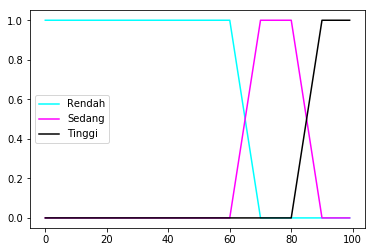

In [0]:
sKom = int(input("Skala Kompetensi (0-n) : "))
aKom,bKom,cKom,dKom = setParameterKompetensi()
grafikKompetensi(sKom,aKom,bKom,cKom,dKom)

## Kepribadian

Skala Kepribadian (0-n) : 100
Parameter < Skala
Buruk < Buruk-Cukup < Cukup-Baik < Baik
Parameter Buruk : 55
Parameter Buruk-Cukup : 65
Parameter Cukup-Baik : 75
Parameter Baik : 85


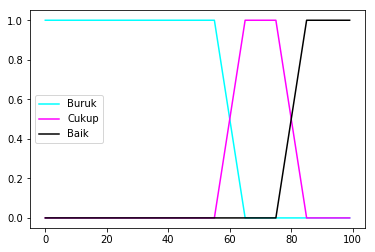

In [0]:
sKep = float(input("Skala Kepribadian (0-n) : "))
aKep,bKep,cKep,dKep = setParameterKepribadian()
grafikKepribadian(sKep,aKep,bKep,cKep,dKep)

## Indexing

In [0]:
data_temp = indexingData(Data)
row0Train, row1Train, row2Train = indexingDataTrain(data_temp)
row0Test, row1Test, row2Test = indexingDataTest(data_temp)

## Prediksi Data

In [0]:
listPrediction = defuzzyfication(DataTrain,aKom,bKom,cKom,dKom,aKep,bKep,cKep,dKep)
resultPrediction_temp = { 'ID': row0Train , 'Tes Kompetensi' : row1Train ,'Kepribadian' : row2Train ,'Diterima': listPrediction}
resultPrediction = pd.DataFrame(resultPrediction_temp)
resultPrediction.head(len(resultPrediction))

,ID,Tes Kompetensi,Kepribadian,Diterima
0,P1,61.0,37.5,Tidak
1,P2,71.0,58.3,Tidak
2,P3,64.0,35.8,Tidak
3,P4,60.0,51.7,Tidak
4,P5,73.5,75.0,Ya
5,P6,66.5,62.5,Ya
6,P7,82.5,15.0,Tidak
7,P8,61.0,37.5,Tidak
8,P9,52.5,54.2,Tidak
9,P10,57.5,79.2,Tidak


### Akurasi Data Prediksi

In [0]:
akurasiData(listPrediction,DataTrain)

Akurasi Data Prediksi : 75.0 %


# Output

In [0]:
listResultDataTest = defuzzyfication(DataTest,aKom,bKom,cKom,dKom,aKep,bKep,cKep,dKep)
resultDataTest_tempp = { 'ID': row0Test , 'Tes Kompetensi' : row1Test ,'Kepribadian' : row2Test ,'Diterima': listResultDataTest}
resultDataTest = pd.DataFrame(resultDataTest_tempp)
resultDataTest.head(len(resultDataTest))

,ID,Tes Kompetensi,Kepribadian,Diterima
0,P21,61.5,52.5,Tidak
1,P22,66.5,58.3,Tidak
2,P23,71.0,45.8,Tidak
3,P24,64.5,55.0,Tidak
4,P25,57.5,79.2,Tidak
5,P26,80.0,45.8,Tidak
6,P27,81.5,53.3,Tidak
7,P28,61.0,64.2,Tidak
8,P29,46.0,65.8,Tidak
9,P30,78.0,49.2,Tidak
